In [1]:
from matplotlib import pyplot as plt
from tofpipe.connection.conn_zmq import Client
from tofpipe.protocol import protobuf, message

Client Connected
temperature of initial frame 38.1103401184082


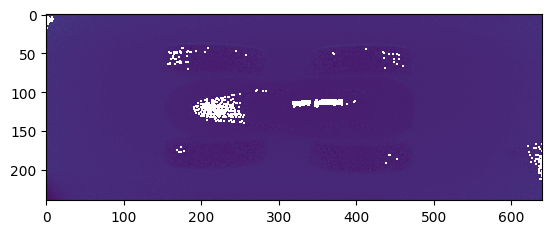

got frame


In [4]:
protocol = protobuf.Protocol()

client = Client(protocol=protocol)
client.connect(host="192.168.1.13", port=5000)

# set exposure to a reasonable value
req = protocol.request()
req.exposure = 80

client.send(req)

def get_frame():
    response = client.recv()
    which = response.response_type

    if which == message.ResponseType.FRAMEDATA:
        return response.frame

frame = get_frame()
if frame[0] == message.FrameType.PHASE:
    phase = frame[1]
    print("temperature of initial frame", frame[2][0])

fig = plt.figure()
phase_handle = plt.imshow(phase)
plt.ion()
plt.show()

frame = get_frame()
if frame[0] == message.FrameType.PHASE:
    phase = frame[1]
    phase_handle.set_data(phase)
    fig.canvas.flush_events()
print('got frame')
client.close()